Import important packages

In [370]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
import string
import seaborn as sns
import tweepy
import pickle


1-1000 and 3000-4000 and 6000-8000 train set 

loading some section of training data

In [2]:
# 
dbfile = open('store', 'rb')      
db = pickle.load(dbfile) 
dbs = open('ds1', 'rb')      
lol = pickle.load(dbs)
# for keys in db: 
#     print(keys, '=>', db[keys]) 
dbfile.close()
lol['q']

,tweet_id,sentiment
0,1240727808005079041,0.116071
1,1240727808340414464,-0.050000
2,1240727808629813248,-0.714286
3,1240727808617230336,0.700000
4,1240727808726482944,0.000000
...,...,...
1995,1240728055846506498,0.500000
1996,1240728056068595712,0.500000
1997,1240728056173559809,0.400000
1998,1240728056257490946,-0.162500


In [3]:
consumer_key = 'beRUzZjIxZEl5321vVt3UbATT'
consumer_key_secret = 'NCByaJCbpKD9VIWtfOMqkiS5vgDIen2UBHuH5j4Y1k5LMxE3Kx'
access_token = '1125091796046843905-gYy5LuPbxxD2JIRaoiWS2ie893hRKw'
access_token_secret = 'fy4NkzDyzD3rpCOnWpmOsiJ4ecH6hxu2mMqsnreja14g9'
x=db['x']
ids=db['ids']
# q=db['q']
q=lol['q']
q

,tweet_id,sentiment
0,1240727808005079041,0.116071
1,1240727808340414464,-0.050000
2,1240727808629813248,-0.714286
3,1240727808617230336,0.700000
4,1240727808726482944,0.000000
...,...,...
1995,1240728055846506498,0.500000
1996,1240728056068595712,0.500000
1997,1240728056173559809,0.400000
1998,1240728056257490946,-0.162500


In [4]:

# dbfile = open('ds', 'ab') 

# # source, destination 
# pickle.dump(df,dbfile)                      
# dbfile.close()
# df

Extract more training data and labeling using tweepy and Watsaon NLU ( commented because data was extracted once labeled and then pickled)

In [5]:
# from ibm_watson import NaturalLanguageUnderstandingV1
# from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
# import json
# from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions,SentimentOptions,CategoriesOptions
# authenticator = IAMAuthenticator('F_htMVlHxYmiGGat0FWAwiOOvhtyn3OB4jM5mHedSUJt')
# natural_language_understanding = NaturalLanguageUnderstandingV1(
#     version='2019-07-12',
#     authenticator=authenticator)

# natural_language_understanding.set_service_url('https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/9182f255-d401-45d1-9481-11cdf1772a78')

In [6]:

# response = natural_language_understanding.analyze(
#     url='www.ibm.com',
#     language='en',
#     features=Features(categories=CategoriesOptions(limit=3))).get_result()

# print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 435,
    "features": 1
  },
  "retrieved_url": "https://www.ibm.com/uk-en",
  "language": "en",
  "categories": [
    {
      "score": 0.866212,
      "label": "/technology and computing/operating systems"
    },
    {
      "score": 0.841544,
      "label": "/technology and computing/hardware/computer"
    },
    {
      "score": 0.793094,
      "label": "/technology and computing/hardware/computer peripherals"
    }
  ]
}


In [7]:
# from progressbar import ProgressBar,Percentage, ProgressBar,Bar,ETA
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=10000000).start()

In [8]:
# auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
# # p=api.get_status(x)
# # p=p.text
# # print(p)

# count=0


# x=[]
# ids=[]

In [9]:
# def clean(p):

#     r=re.sub('^RT|@[a-zA-Z0-9]*:|@[a-zA-Z0-9]*',"",p)

#     # r=''.join(r)
#     text = re.sub("@[\w]*","",r)
#     text = re.sub("https?://[A-Za-z0-9./]*","",text)
#     text = re.sub("\n","",text)
#     # r=re.split('^ @[a-zA-Z]*:',r)
#     r=''.join(text)
#     return r

generating few sentences using frequently used words in positive,negative and neutral sentences

In [252]:
from itertools import combinations
text = "disheartened stop die death disappointed deeply cancel disgusting surge arrest political help poor jobless unemployment kill selfish sick lockdown angry sad lies horrible sucks fake demise coward condemn stuck hunger stranded suffering wasted suspend failed terrorist irresponsible bad"
lst = text.split()
temp=[]
j=[]

for start,end in combinations(range(len(lst)), 2):
        temp.append(lst[start:end+1])
for i in temp:
    j.append(" ".join(i))
j={'text':j}
n=pd.DataFrame(j)
n['labels']=-1

In [253]:
text = "greatful vaccine hope best respect smile thankful thankyou coronawarriors dilse happy beautiful congrats beloved defence salute best greatful sacrifice covid warriors doctors nurses distribute donate superb proud flag army generous cure recovery ayurveda good"
lst = text.split()
temp=[]
j=[]

for start,end in combinations(range(len(lst)), 2):
        temp.append(lst[start:end+1])
for i in temp:
    j.append(" ".join(i))
j={'text':j}
pos=pd.DataFrame(j)
pos['labels']=1
pos=pos.sample(100)
pos.reset_index(drop=True,inplace=True)

In [254]:
text = "lol joke laugh lmao played dance pic rofl hillarious buy"
lst = text.split()
temp=[]
j=[]

for start,end in combinations(range(len(lst)), 2):
        temp.append(lst[start:end+1])
for i in temp:
    j.append(" ".join(i))
j={'text':j}
nu=pd.DataFrame(j)
nu['labels']=0
# nu=nu.sample(200)
nu.reset_index(drop=True,inplace=True)

importing more training data 

In [255]:
# def lop(dfx):
    
#     for i in pbar(dfx.tweet_id):
#         try:
#             p=api.get_status(i)
#     #         print(i)
#             p=p.text
#             x.append(clean(p))
#         except:
#             ids.append(i)
# #             count=count+1
#             pass
cross=pd.read_csv('cor.csv',encoding='latin-1')
train=pd.read_csv('train.csv',encoding='latin-1')
nw=pd.read_csv('words.csv')
pw=pd.read_csv('poswords.csv')
# lock1=pd.read_csv('lockdown1.csv')
# cross=pd.concat([cross,lock1[lock1['predictions']==1][1:900]])
con=cross[['tweet','predictions','date']][train['tweet'].notnull()]
# pos=cross[['tweet','predictions']][cross['predictions']==0]
# neg=cross[['tweet','predictions']][cross['predictions']==1]
neu=train[['tweet','predictions']][train['tweet'].notnull()][(train['predictions']=='neutral')].sample(2000)
neu['predictions']=neu['predictions'].apply(lambda x: 2)

# neg=train[['tweet','predictions']][train['tweet'].notnull()][(train['predictions']=='negative')].sample(500)
# neg['predictions']=neg['predictions'].apply(lambda x: 1)
# pos=train[['tweet','predictions']][train['tweet'].notnull()][(train['predictions']=='positive')][0:900]
# pos['predictions']=pos['predictions'].apply(lambda x: 0   )
con=pd.concat([con,neu,pos]);
con['text']=con['tweet']
con['labels']=con['predictions']
con=con.drop(columns=['tweet','predictions'])
con['labels']=con['labels'].apply(lambda x: 1 if x == 0 else (-1 if x==1 else 0))
# con[con['labels']== 0]
con=pd.concat([con,n,nu])
con.reset_index(drop=True,inplace=True)
con
# x=[{'text':'terrorism','labels':-1},{'text':'covidwarrior','labels':1},{'text':'covid warriors','labels':1},{'text':'shut up','labels'},

C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,date,text,labels
0,25-03-2020 23:29,put home quarantine stamp hands take aadhaar p...,-1
1,25-03-2020 20:45,have recharge months pack and then work from h...,-1
2,25-03-2020 18:25,dear chef minister shri vijay bhai mother stuc...,-1
3,25-03-2020 13:57,exercise yoga work from home reading cooking i...,1
4,25-03-2020 11:01,this was old video more than months old and vi...,-1
...,...,...,...
7408,NaN,pic rofl hillarious,0
7409,NaN,pic rofl hillarious buy,0
7410,NaN,rofl hillarious,0
7411,NaN,rofl hillarious buy,0


loading training data labelled by NLU

In [256]:
# # p=[]
# # k=[]
# # r=[]
# # temp=df['hashtags']

# # temp[2]
# # for i in temp:
# #     r.append(i.strip('[]').replace("#","").replace("'","").split(','))

# # # r=r.replace("'","")
# # # k=r.split(',')
# # # k=k.strip()
# lop(df.loc[0:200].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[201:400].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[401:600].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[601:700].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[701:800].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[801:1000].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# cop=pd.read_csv('Lockdown1.csv')
# lock1=cop[:500]
# lock12=cop[500:1000]
dbfile = open('lock1', 'rb')      
db = pickle.load(dbfile) 
# dbs = open('ds1', 'rb')      
# lol = pickle.load(dbs)
# for keys in db: 
#     print(keys, '=>', db[keys]) 
dbfile.close()
lock1=db['lock1']

In [257]:
# d700=pd.DataFrame(x)
# d700.to_csv('data1000.csv')
# idx=pd.DataFrame(ids)
# # idx.to_csv('ids.csv')
# df=pd.read_excel('lock1.xlsx')
# q=df.head(2000)
# lol = {} 
# lol['q'] = q


# # Its important to use binary mode 
# dbs = open('ds1', 'ab') 

# # source, destination 
# pickle.dump(lol, dbs)                      
# dbfile.close()
def sentiment_and_keyword(st,service=natural_language_understanding):
    return (service.analyze(text=st,language='en',features=Features(keywords=KeywordsOptions(sentiment= True,emotion= True,limit= 3),sentiment=SentimentOptions())).get_result())


In [260]:
lock1

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment_keyword_json
0,0,1242881400186892291,1242881400186892291,1585160992000,2020-03-25 23:59:52,530,NaN,Business Standard: End of coronavirus pandemic...,[],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '869018357432950785', 'username':...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
1,1,1242881390712143872,1242881390712143872,1585160989000,2020-03-25 23:59:49,530,NaN,Designed By:- The Rohit Sharma\n.\n#therohitsh...,"['#therohitsharmapdt', '#graphicdesigncommunit...",[],...,NaN,NaN,NaN,NaN,"[{'user_id': '969105551270428672', 'username':...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
2,2,1242881383518748672,1242881383518748672,1585160988000,2020-03-25 23:59:48,530,NaN,@AUThackeray Sir thank you so much for All you...,[],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '2226621902', 'username': 'amazin...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
3,3,1242881339382042624,1242824467019001862,1585160977000,2020-03-25 23:59:37,530,NaN,Indian Govt has not allowed cheap Elisa and ra...,[],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '39454122', 'username': 'lovekesh...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
4,4,1242881321774354432,1242881321774354432,1585160973000,2020-03-25 23:59:33,530,NaN,Coronavirus killing all the people but beyandh...,['#beyhadh2'],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '1310490444', 'username': 'brindh...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,1245773133254025216,1245773133254025216,1585850434000,2020-04-02 23:30:34,530,NaN,"UK government sets goal of reaching 100,000 te...",['#covid19'],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '2541069122', 'username': 'Nishch...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
496,496,1245772938265034752,1245772938265034752,1585850388000,2020-04-02 23:29:48,530,NaN,One more doctor from #dharavi tests positive f...,"['#dharavi', '#covid19', '#covid19pandemic', '...",[],...,NaN,NaN,NaN,NaN,"[{'user_id': '2299530205', 'username': 'bhavik...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
497,497,1245772923484266497,1245772923484266497,1585850384000,2020-04-02 23:29:44,530,NaN,The government needs to announce another stimu...,[],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '1225788429696294913', 'username'...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."
498,498,1245772908993089536,1245772908993089536,1585850381000,2020-04-02 23:29:41,530,NaN,A quick look at the Netflix Top 10 trending in...,[],[],...,NaN,NaN,NaN,NaN,"[{'user_id': '9559392', 'username': 'ahmadbaba...",NaN,NaN,NaN,NaN,"{'usage': {'text_units': 1, 'text_characters':..."


In [261]:
df2 = lock1[['tweet','sentiment_keyword_json']]
# df3= lock12[['tweet','sentiment_keyword_json']]
# df3=df3.reset_index()
df2

,tweet,sentiment_keyword_json
0,Business Standard: End of coronavirus pandemic...,"{'usage': {'text_units': 1, 'text_characters':..."
1,Designed By:- The Rohit Sharma\n.\n#therohitsh...,"{'usage': {'text_units': 1, 'text_characters':..."
2,@AUThackeray Sir thank you so much for All you...,"{'usage': {'text_units': 1, 'text_characters':..."
3,Indian Govt has not allowed cheap Elisa and ra...,"{'usage': {'text_units': 1, 'text_characters':..."
4,Coronavirus killing all the people but beyandh...,"{'usage': {'text_units': 1, 'text_characters':..."
...,...,...
495,"UK government sets goal of reaching 100,000 te...","{'usage': {'text_units': 1, 'text_characters':..."
496,One more doctor from #dharavi tests positive f...,"{'usage': {'text_units': 1, 'text_characters':..."
497,The government needs to announce another stimu...,"{'usage': {'text_units': 1, 'text_characters':..."
498,A quick look at the Netflix Top 10 trending in...,"{'usage': {'text_units': 1, 'text_characters':..."


In [262]:
def sentiment_extractor(row_num):
    sentiment_scores=df2['sentiment_keyword_json'][row_num]['sentiment']['document']
    return sentiment_scores
    
"""
Extract keywoord score/s and append it to a new column in the dataframe
INPUT: JSON
OUTPUT: DICTIONARY [{Keyword1:Score},{Keyword2:Score},{Keyword3:Score}]
"""
def keyword_extractor(row_num):
    keyword_scores=[{df2['sentiment_keyword_json'][row_num]['keywords'][i]['text'] : df2['sentiment_keyword_json'][row_num]['keywords'][i]['sentiment']['score']} for i in range(0,len(df2['sentiment_keyword_json'][row_num]['keywords']))]
    return keyword_scores

In [263]:
df2['sentiment_score'] = df2.apply(lambda row : sentiment_extractor(row.name),axis = 1)
df2['keyword_score'] = df2.apply(lambda row : keyword_extractor(row.name),axis = 1)
# df3['sentiment_score'] = df3.apply(lambda row : sentiment_extractor(row.name),axis = 1)
# df3['keyword_score'] = df3.apply(lambda row : keyword_extractor(row.name),axis = 1)

C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [265]:
# df2=


df2=pd.read_csv('df2.csv')
dbfile = open('store', 'rb')      
db = pickle.load(dbfile) 
dbs = open('ds1', 'rb')      
lol = pickle.load(dbs)
# for keys in db: 
#     print(keys, '=>', db[keys]) 

x=db['x']
ids=db['ids']
# q=db['q']
q=lol['q']
x=db['x']
ids=db['ids']
# q=db['q']
q=lol['q']

In [266]:
# lop(df.loc[1001:1100].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[1201:1400].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[1401:1600].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[1601:1700].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[1701:1800].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# lop(df.loc[1801:2000].reset_index(drop=True))
# pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
#                    maxval=300).start()
# d2000=pd.DataFrame(x)
# d2000.to_csv('data2000.csv')
# db = {} 
# db['x'] = x 
# db['ids'] = ids 

# # Its important to use binary mode 
# dbfile = open('store', 'ab') 

# # source, destination 
# pickle.dump(db, dbfile)                      
# dbfile.close()
# con'

q=lol['q']
x=db['x']
# q=df.head(2000)
# df2=df2[['tweet','labels']][(df2['labels']==0)|(df2['labels']==-1)]

putting together all training data collected from various sources

In [267]:
temp = pd.DataFrame(data={'tweet_id':ids})
q = q[~q['tweet_id'].isin(temp['tweet_id'])]
q.reset_index(drop=True,inplace=True)
df2['text']=df2['tweet']
# df3['text']=df3['tweet']
q['text']=x
# print(len(q[q['emo']=='negative']))
q['emo']=q['sentiment'].apply(lambda x:'positive' if x > 0 else('negative' if x <0 else 'neutral' ))
q['labels']=q['emo'].apply(lambda x:1 if x=="positive" else(-1 if x=="negative" else 0))
q=pd.DataFrame(q)
# q.to_csv('neg.csv')
# e=pd.concat([q,con],axis=0)
# sns.countplot(x='emo',data=q)
i=q[(q['labels']==0)|(q['labels']==-1)]
df2=df2[(df2['labels']==-1)]
df2.reset_index(drop=True,inplace=True)
i.reset_index(drop=True,inplace=True)
i.drop_duplicates(subset =["text"],inplace=True)
# i.to_csv('neg1.csv')
e=pd.concat([con,df2,i])
# e=con
# e['text']=e['text'][e['text'] != 'holy shit I hate every person in this video']
# e=e[.notnull()
e.drop_duplicates(subset =["text"],inplace=True)
len(i)

C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\envs\Rssi\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

591

In [268]:
# from textblob import TextBlob
# df['polarity_score']=df['tweet'].apply(lambda text:TextBlob(text).sentiment.polarity )
# df['polarity']=df['polarity_score'].apply(lambda x:'positive' if x>0 else('negative' if x<0 else 'neutral'))
# df['label']=df['polarity'].apply(lambda x:1 if x=="positive" else(0 if x=="negative" else -1))
# df
# e['text']
# e[e['labels'] == -1]
e.dropna(subset =["text"],inplace=True) 
# # e['text'][1599]
# e.to_csv('final2.csv')
e.reset_index(drop=True,inplace=True)

In [269]:
# title_list=[]

# for title in df.tweet:
#     title = re.sub("[^a-zA-Z]"," ", title)
#     title = title.lower()
#     title = nltk.word_tokenize(title)
#     lemma = nltk.WordNetLemmatizer()
#     title = [ lemma.lemmatize(word) for word in title]
#     title = " ".join(title)
#     title_list.append(title)
# title_list
e



,date,text,labels,Unnamed: 0,tweet,sentiment_keyword_json,sentiment_score,keyword_score,polarity_score,score,label,tweet_id,sentiment,emo
0,25-03-2020 23:29,put home quarantine stamp hands take aadhaar p...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-03-2020 20:45,have recharge months pack and then work from h...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-03-2020 18:25,dear chef minister shri vijay bhai mother stuc...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-03-2020 13:57,exercise yoga work from home reading cooking i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-03-2020 11:01,this was old video more than months old and vi...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,NaN,"Lets all join hands and chant Corona GO, GO ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240728e+18,0.000,neutral
8059,NaN,The Post's took a photo of Pres. Trump's re...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240728e+18,0.000,neutral
8060,NaN,Now i want corona,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240728e+18,0.000,neutral
8061,NaN,Avg flu infections per year is 1 billion. A...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240728e+18,-0.175,negative


# Data Distribution

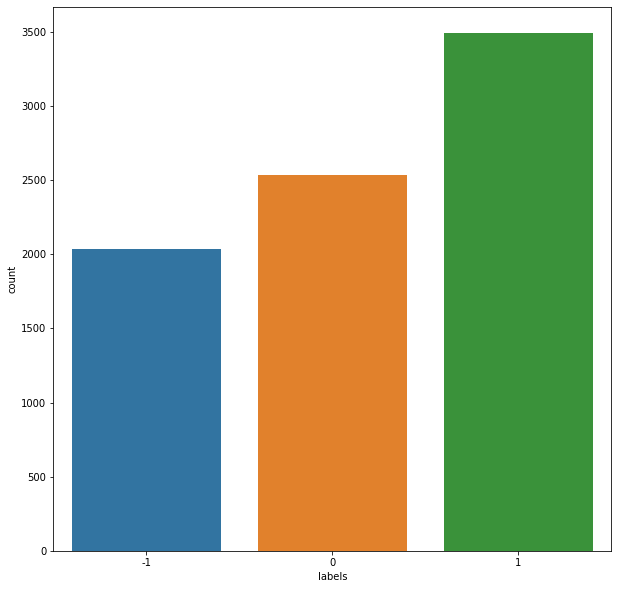

In [270]:
sns.countplot(x='labels',data=e)

# cleaning data by using nltk

In [3]:
tweet="hello world, my name is varun naik."
tweet=tweet.split();tweet

['hello', 'world,', 'my', 'name', 'is', 'varun', 'naik.']

In [26]:
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import re

In [10]:
def normalizer(tweet):
    ps = PorterStemmer() 
    wnl = WordNetLemmatizer()
    
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    tweets = " ".join(filter(lambda x: x[0]!= '@', tweet.split()))
    tweets = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',' ',tweets)
    tweets = re.sub(r'([^a-zA-Z0-9])', ' ', tweets)
    
    tweets = re.sub(r'#', ' ', tweets)
#     tweets=re.sub(r'[^\w\s]','',tweets)
    
#     tweets=re.sub('[\s][a-z]{1,3}[\s]',' ',tweets)
#     tweets=re.sub('\W*\b\w{1,2}\b','',tweets)
   
#     tweets=re.sub(r'[0-9_]','',tweets)
    
   # text = re.sub(r'https?:\/\/.*[\r\n]*', '',tweets)
    tweets = tweets.lower()
    
    tweets = re.sub(sequencePattern, seqReplacePattern, tweets)
#     print(tweets)
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [wnl.lemmatize(word) for word in tweets]
    
    tweets = " ".join(tweets)
    

#     print(tweets[0])
#     tweets=tweets.split(" ")
    
    tweets= word_tokenize(tweets)   
#     print(tweets)
    t=[]   
    for j in tweets:
#            
           t.append((j))
#            t.append(wnl.lemmatize(j))
           t.append(" ")
           
            
    tweets=" ".join(t)
#     tweets = tweets.split()
#     tweets=tweets.replace('ing','')
#     tweets=tweets.replace('pic','')
#     tweets=tweets.replace('com','')
    return tweets

In [11]:
normalizer('https://github.com/varun1414/ ')

''

In [34]:
tweets="this is gooooood"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"
tweets = re.sub(sequencePattern, seqReplacePattern, tweets)


tweets = tweets.split()
tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
tweets

['good']

In [13]:
tweet="http://localhost:8888/notebooks/Twitter%20Sentiment%20Analysis.ipynb"
tweets = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',' ',tweet)
print(tweets)

In [25]:
import emoji
tweet = "game is on 🔥 🔥"
emoji.demojize(tweet, delimiters=("", ""))


'game is on fire fire'

In [37]:
ps = PorterStemmer()
example_words = ["very","clearly","important","booked"]
for w in example_words:
    print(ps.stem(w))

veri
clearli
import
book


Passing the training/testing data set through normalize function to clean the tweets

In [274]:
e['normalized_text'] = e.text.apply(normalizer)


In [276]:
# e.dropna(subset=['normalized_text'],inplace)
x=e['normalized_text']
# t=pd.DataFrame(x)
# e[e['normalized_text'] == 'holi shit hate everi person video']
# t['normalized_text']=='   holi shit hate everi person video'


Finding frequently words in positive sentiments

In [277]:
s=(list(e[e['labels']==1]['normalized_text']))
s=' '.join(s)
s=s.split()


In [278]:
import collections
pos = pd.DataFrame(collections.Counter(s).most_common(300),
                             columns=['words', 'count'])

# clean_tweets_no_urls.head(e[e['labels']==1]['normalized_text'].most_common(10),columns=['words', 'count'])
pos

,words,count
0,home,3738
1,work,2323
2,stay,971
3,twitter,855
4,com,851
...,...,...
295,deliv,34
296,leav,34
297,kashmir,34
298,next,33


Finding frequently words in negative sentiments

In [279]:
s=(list(e[e['labels']==-1]['normalized_text']))
s=' '.join(s)
s=s.split()


In [280]:
neg = pd.DataFrame(collections.Counter(s).most_common(50),
                             columns=['words', 'count'])

# clean_tweets_no_urls.head(e[e['labels']==1]['normalized_text'].most_common(10),columns=['words', 'count'])
neg

,words,count
0,home,701
1,lockdown,632
2,work,457
3,help,423
4,sick,393
5,sad,390
6,angri,379
7,lie,377
8,kill,375
9,selfish,374


Finding frequently words in neutral sentiments

In [372]:
s=(list(e[e['labels']==0]['normalized_text']))
s=' '.join(s)
s=s.split()
neu = pd.DataFrame(collections.Counter(s).most_common(50),
                             columns=['words', 'count'])

# clean_tweets_no_urls.head(e[e['labels']==1]['normalized_text'].most_common(10),columns=['words', 'count'])
neu

,words,count
0,corona,230
1,go,229
2,home,185
3,work,182
4,day,162
5,get,153
6,twitter,125
7,pic,117
8,like,115
9,lol,106


# word clouds for positive,negative and neutral sentiments 

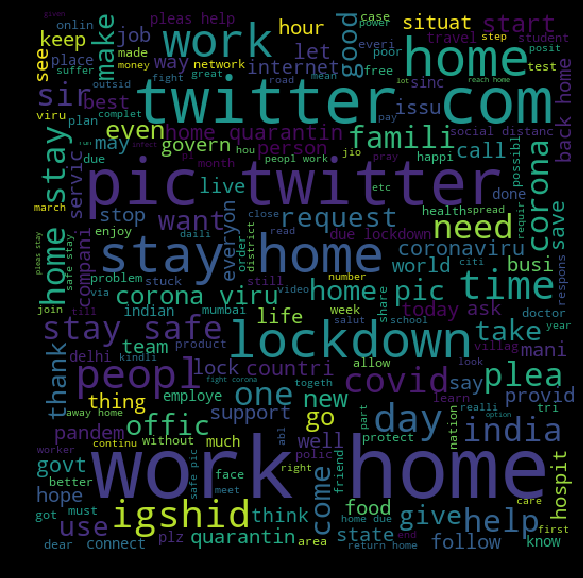

In [281]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
pos=' '.join(list(e[e['labels']==1]['normalized_text']))
posw=WordCloud(width=512,height=512).generate(pos)
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(posw)
plt.show()

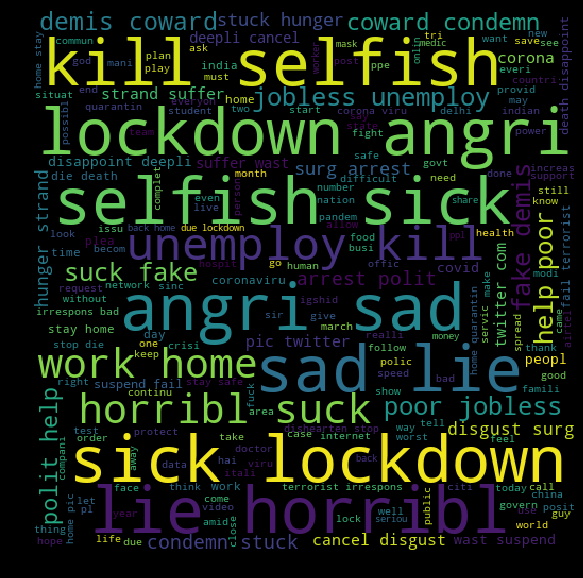

In [282]:
from wordcloud import WordCloud 
pos=' '.join(list(e[e['labels']==-1]['normalized_text']))
posw=WordCloud(width=512,height=512).generate(pos)
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(posw)
plt.show()

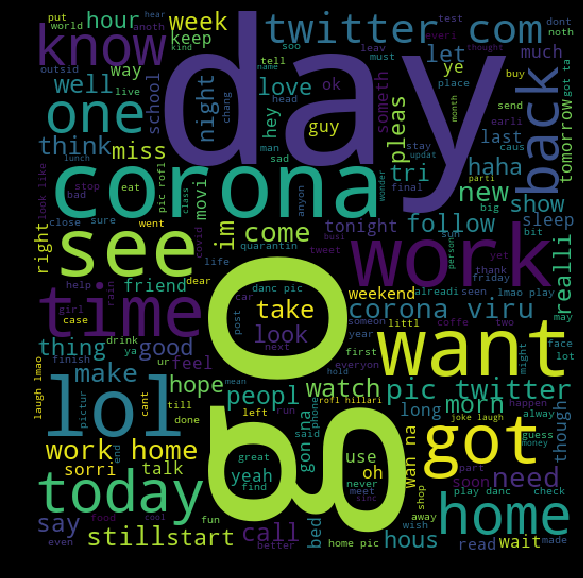

In [283]:
from wordcloud import WordCloud 
pos=' '.join(list(e[e['labels']==0]['normalized_text']))
posw=WordCloud(width=512,height=512).generate(pos)
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(posw)
plt.show()

# splitting data into training(70%) and testing(30%) data 

In [368]:
x=e['normalized_text']
y=e["labels"].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)
# train_vectors.get_feature_names()
db = {} 
db['x_train'] = x_train
db['x_test'] = x_test
db['y_train'] = y_train
db['y_test'] = y_test
# db['ids'] = ids 

# Its important to use binary mode 
dbfile = open('train', 'ab') 

# source, destination 
pickle.dump(db, dbfile)                      
dbfile.close()
print(len(x_train))

x_train (5644,)
x_test (2419,)
y_train (5644,)
y_test (2419,)
5644


# building vectorizer and  forming vocabulary

In [369]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( 
                analyzer='word', binary=False, decode_error='strict',
                 encoding='utf-8',
                input='content', lowercase=True,max_features=4000,
                min_df=4, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
vectorizer.fit(x_train)

print(len(vectorizer.get_feature_names()))
x_train = vectorizer.transform(x_train).toarray()
x_test  = vectorizer.transform(x_test).toarray()
vector = {} 

vectorizer
pickle.dump(vectorizer, open("vector.pickel", "wb"))

3216


saving vectorizer and datasets

In [366]:
# t=[]
# for i in e.values:
#            k=word_tokenize(i[5])

#            for j in k:
#                 if j in list(vectorizer.get_feature_names()):
#                        t.append({'word':j,'label':i[1]})
# e[e['normalized_text']==np.inf]
vectorizer = pickle.load(open("vector.pickel", "rb"))
w = pickle.load(open('train', 'rb'))
x_train2=w['x_train']
vectorizer.fit(x_train)
print(vectorizer)
print(len(vectorizer.get_feature_names()))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=4000,
                min_df=4, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
3216


# Trying Out different models.

In [373]:
import joblib
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# naive_bayes

In [296]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Accuracy => ", nb.score(x_test,y_test)*100)

Accuracy =>  64.07606448945845


In [374]:
# y_prob=rf.predict_prob(x_test,y_test)
y_pred=nb.predict(x_test)

In [376]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
plt.rcParams['figure.figsize'] = (10,10)
# ax =sns.heatmap(confusion_matrix(y_test,y_pred,labels=[-1,0,1]), annot=True,cmap='coolwarm')
bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

Accuracy on test set: 64.076%
Precision on test set: 0.643
Recall on test set: 0.659
F1-Score on test set: 0.636
Confusion Matrix : 
[[392  90 131]
 [ 74 646  44]
 [343 187 512]]


# kfold cross validation

In [377]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(nb,x_train,y_train,cv=2)
print(np.mean(scores))

0.6840892983699504


# LogisticRegression

In [379]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=2,max_iter=3500,random_state =42)

classifier1.fit(x_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [348]:
print(len(x_train[2]))

3216


In [380]:
y_pred =classifier1.predict(x_test)
y_prob = classifier1.predict_proba(x_test)
classifier1.score(x_test,y_test)

0.819346837536172

In [301]:
import joblib
filename='logR.sav'
joblib.dump(classifier1,filename)

['logR.sav']

In [381]:
# print(f1_score(y_test, y_pred))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


Accuracy on test set: 81.935%
Precision on test set: 0.821
Recall on test set: 0.792
F1-Score on test set: 0.798
Confusion Matrix : 
[[347  58 208]
 [ 35 688  41]
 [ 53  42 947]]


# kfold CV

In [304]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier1,x_train,y_train,cv=5)
print(np.mean(scores))

0.8215809509451031


# Predicting on tweets from lockdown 1,2,3 and 4

In [182]:
lock1=pd.read_csv('Lockdown1.csv')



In [183]:
lock1

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1242881400186892291,1242881400186892291,1585160992000,2020-03-25 23:59:52,530,NaN,Business Standard: End of coronavirus pandemic...,[],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '869018357432950785', 'username':...",NaN,NaN,NaN,NaN
1,1,1242881390712143872,1242881390712143872,1585160989000,2020-03-25 23:59:49,530,NaN,Designed By:- The Rohit Sharma\n.\n#therohitsh...,"['#therohitsharmapdt', '#graphicdesigncommunit...",[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '969105551270428672', 'username':...",NaN,NaN,NaN,NaN
2,2,1242881383518748672,1242881383518748672,1585160988000,2020-03-25 23:59:48,530,NaN,@AUThackeray Sir thank you so much for All you...,[],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '2226621902', 'username': 'amazin...",NaN,NaN,NaN,NaN
3,3,1242881339382042624,1242824467019001862,1585160977000,2020-03-25 23:59:37,530,NaN,Indian Govt has not allowed cheap Elisa and ra...,[],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '39454122', 'username': 'lovekesh...",NaN,NaN,NaN,NaN
4,4,1242881321774354432,1242881321774354432,1585160973000,2020-03-25 23:59:33,530,NaN,Coronavirus killing all the people but beyandh...,['#beyhadh2'],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '1310490444', 'username': 'brindh...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,4565,1251201598908440579,1251201598908440579,1587144682000,2020-04-17 23:01:22,530,NaN,Useful thread about Coronavirus ! https://twi...,[],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '613131484', 'username': 'aagat2'}]",NaN,NaN,NaN,NaN
4566,4566,1251201578297630720,1251201578297630720,1587144677000,2020-04-17 23:01:17,530,NaN,#IndiaUnitedAgainstCorona\nStrengthening the f...,['#indiaunitedagainstcorona'],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '941013921443364864', 'username':...",NaN,NaN,NaN,NaN
4567,4567,1251201569967783941,1251201569967783941,1587144675000,2020-04-17 23:01:15,530,NaN,We are trying to provide food people who are i...,[],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '782574691059838976', 'username':...",NaN,NaN,NaN,NaN
4568,4568,1251201500891820032,1251201500891820032,1587144658000,2020-04-17 23:00:58,530,NaN,@DDNational please repeat telecast of malgudi ...,[],[],...,"28.5934,77.2223,2000km",NaN,NaN,NaN,NaN,"[{'user_id': '869269986975633413', 'username':...",NaN,NaN,NaN,NaN


In [184]:
x1=lock1.tweet.apply(normalizer)

In [382]:
l=vectorizer.transform(x1).toarray()
len(l)

1

In [383]:
m=classifier1.predict(l)


In [190]:
x1=pd.DataFrame(x1)
text=pd.DataFrame(x1,columns=['text'])
label=pd.DataFrame(m,columns=['labels'])
# label=pd.DataFrame(m,columns=['labels'])
l1=pd.concat([lock1,text,label],axis=1)
# l1[l1['labels']==-1]
l1.to_csv("lock1n.csv")

lockdown 1

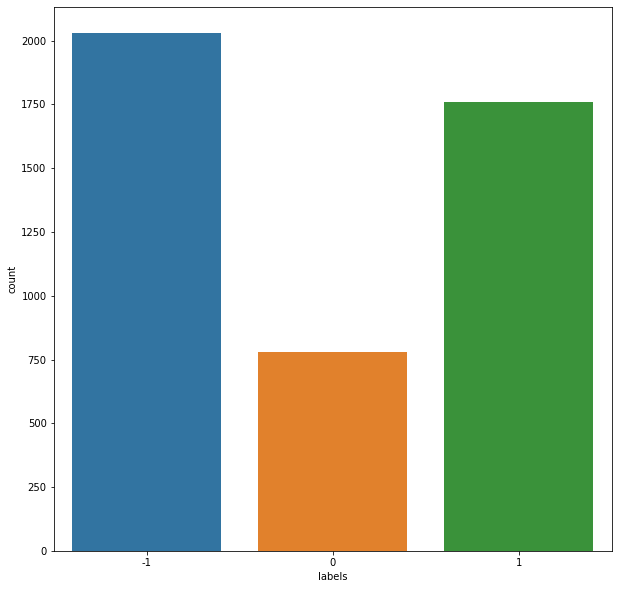

In [191]:
sns.countplot(x='labels',data=l1)

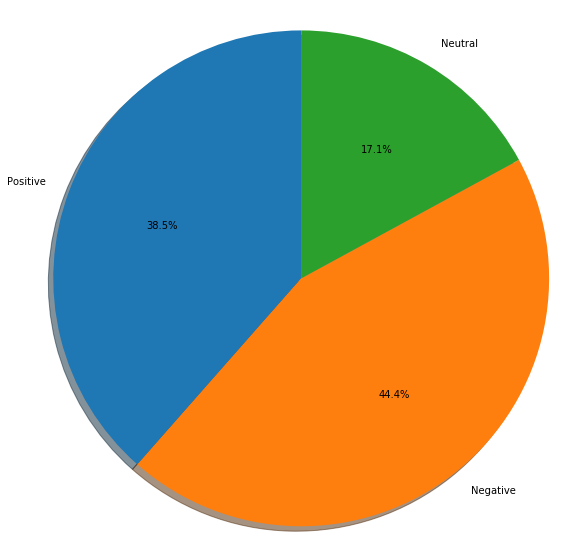

In [193]:
labels = 'Positive','Negative','Neutral'
sizes = [l1['labels'][l1['labels']==1].count(),l1['labels'][l1['labels']==-1].count(),l1['labels'][l1['labels']==0].count()]
# explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [163]:
lock2=pd.read_csv('Lockdown2.csv')
x2=lock2.tweet.apply(normalizer)


In [164]:
l2=vectorizer.transform(x2).toarray()
m2=classifier1.predict(l2)

In [165]:
text=pd.DataFrame(x2)
label=pd.DataFrame(m2,columns=['labels'])
l2=pd.concat([lock2,text,label],axis=1)
# l2[l2['labels']==-1]
l2.to_csv("lock2.csv")

lockdown 2

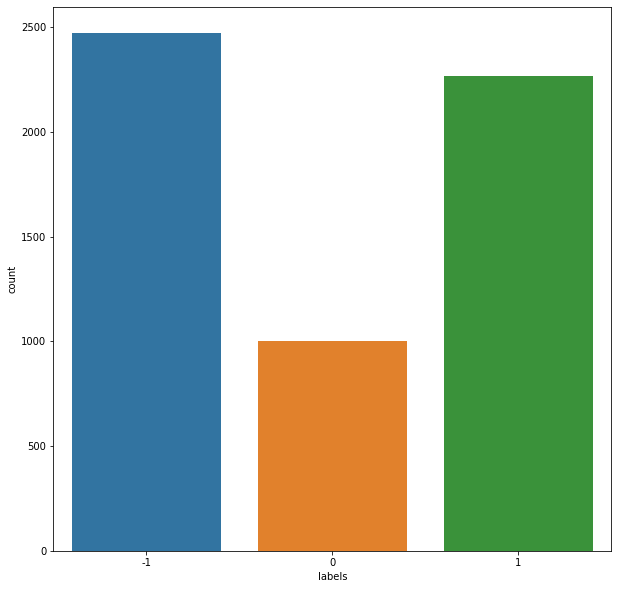

In [166]:
sns.countplot(x='labels',data=l2)

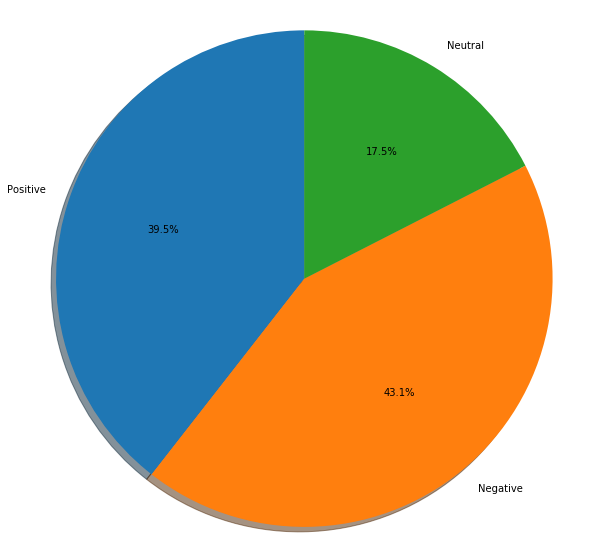

In [167]:
labels = 'Positive','Negative','Neutral'
sizes = [l2['labels'][l2['labels']==1].count(),l2['labels'][l2['labels']==-1].count(),l2['labels'][l2['labels']==0].count()]
# explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [388]:
lock3=pd.read_csv('Lockdown3.csv')
x3=lock3.tweet.apply(normalizer)

lockdown 3

In [389]:
l3=vectorizer.transform(x3).toarray()
m3=classifier1.predict(l3)

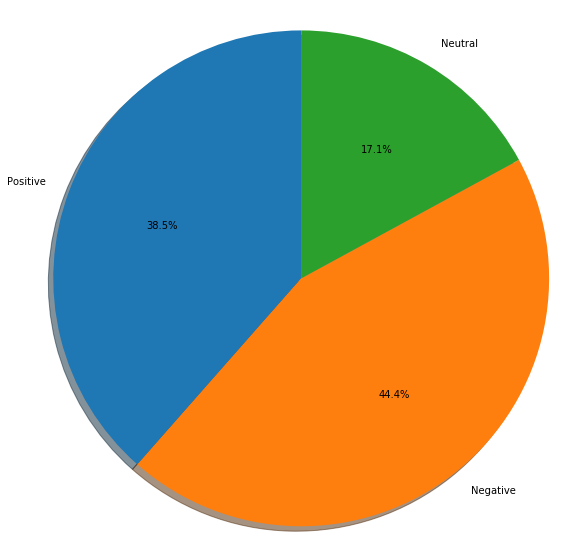

In [391]:
labels = 'Positive','Negative','Neutral'
text=pd.DataFrame(x3)
label=pd.DataFrame(m3,columns=['labels'])
# sizes = [l3['labels'][l3['labels']==1].count(),l3['labels'][l3['labels']==-1].count(),l3['labels'][l3['labels']==0].count()]
# explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
l3=pd.concat([lock3,text,label],axis=1)
l3.to_csv('lock3.csv')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

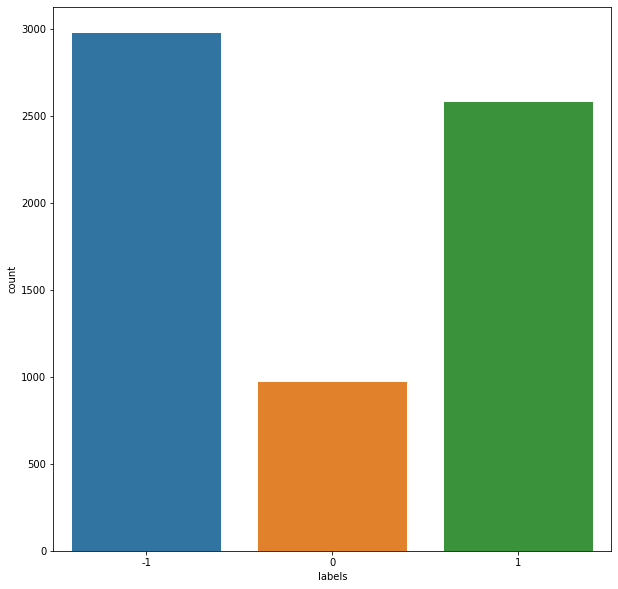

In [392]:
sns.countplot(x='labels',data=l3)

In [394]:
lock4=pd.read_csv('Lockdown4.csv')
x4=lock4.tweet.apply(normalizer)

lockdown 4

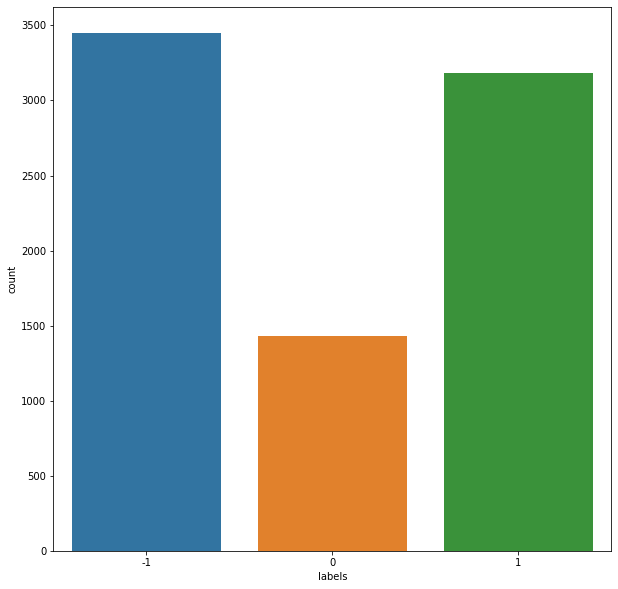

In [397]:
l4=vectorizer.transform(x4).toarray()
m4=classifier1.predict(l4)
text=pd.DataFrame(x4)
label=pd.DataFrame(m4,columns=['labels'])
l4=pd.concat([lock4,text,label],axis=1)
l4.to_csv("lock4.csv")
sns.countplot(x='labels',data=l4)
# l4

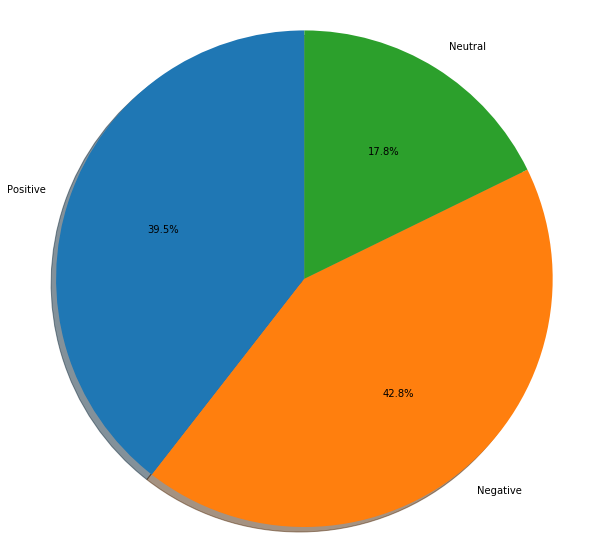

In [398]:
labels = 'Positive','Negative','Neutral'
sizes = [l4['labels'][l4['labels']==1].count(),l4['labels'][l4['labels']==-1].count(),l4['labels'][l4['labels']==0].count()]
# explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()